# Linear regression

Linear regression attempts to model the relationship between one  or more independent variables and predicted value by fitting a linear equation to observed data.

## Problem Statement

Assume you have a dataset of 5 samples describes housing prices like the following

| Size (sqft)     | Price ($) |
| ----------------| ------------------------ |
| 1000               | 300K                      |
| 2500               | 550K                      |
| 3000               | 700K                      |
| 4000               | 800K                      |

We want to fit a linear regression model to fit our data so we can use it to predict a price for unsold house by providing it's size as input, say a house with 3500 sqft size.

In [1]:
# Imports
import math, copy
import numpy as np
import matplotlib.pyplot as plt

## Dataset

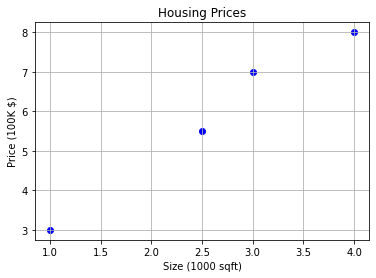

In [3]:
# Define dataset
x_train = np.array([1,2.5,3,4])   #features
y_train = np.array([3, 5.5, 7, 8])   #target value
# Plot the data
plt.scatter(x_train, y_train, marker='o', c='b')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (100K $)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.grid()
plt.show()


## Cost Function
The equation for cost with one variable is: $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 


In [5]:
def cost_func(x,y,w,b):
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    """
    # define model function
    preds = np.dot(w,x)+b
    cost = np.sum((preds-y)**2)
    return cost/(2 * x.shape[0])

*gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$


The gradient is defined as:
$$\begin{align} \frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\\end{align}$$

## compute_gradient
`compute_gradient`  implements above equations and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$

In [7]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost of parameters w
      dj_db (scalar): The gradient of the cost of parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    # define model function
    preds = np.dot(w,x)+b
    dj_dw = np.sum((preds-y)*x)/m
    dj_db = np.sum(preds-y)/m
    return dj_dw, dj_db

##  Gradient Descent
Now that gradients can be computed,  gradient descent can be implemented below in `gradient_descent`. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of $w$ and $b$ on the training data.

In [21]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        J_history.append( cost_function(x, y, w , b))
        p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #  return w and J,w history for graphing

In [22]:
# initialize parameters
w_init = 1.75
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, cost_func, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.40e-01  dj_dw: -3.328e+00, dj_db: -1.281e+00   w:  1.783e+00, b: 1.28125e-02
Iteration 1000: Cost 4.80e-02  dj_dw:  1.442e-02, dj_db: -4.358e-02   w:  1.830e+00, b: 1.02828e+00
Iteration 2000: Cost 4.06e-02  dj_dw:  3.880e-03, dj_db: -1.172e-02   w:  1.750e+00, b: 1.27076e+00
Iteration 3000: Cost 4.00e-02  dj_dw:  1.044e-03, dj_db: -3.154e-03   w:  1.728e+00, b: 1.33599e+00
Iteration 4000: Cost 4.00e-02  dj_dw:  2.808e-04, dj_db: -8.485e-04   w:  1.722e+00, b: 1.35354e+00
Iteration 5000: Cost 4.00e-02  dj_dw:  7.555e-05, dj_db: -2.283e-04   w:  1.721e+00, b: 1.35826e+00
Iteration 6000: Cost 4.00e-02  dj_dw:  2.033e-05, dj_db: -6.141e-05   w:  1.720e+00, b: 1.35953e+00
Iteration 7000: Cost 4.00e-02  dj_dw:  5.468e-06, dj_db: -1.652e-05   w:  1.720e+00, b: 1.35987e+00
Iteration 8000: Cost 4.00e-02  dj_dw:  1.471e-06, dj_db: -4.445e-06   w:  1.720e+00, b: 1.35997e+00
Iteration 9000: Cost 4.00e-02  dj_dw:  3.957e-07, dj_db: -1.196e-06   w:  1.720e+00, b: 1.35999e+00


## Plot the model

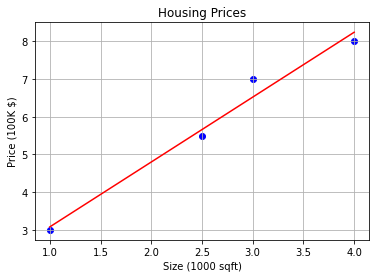

In [11]:
# Define dataset
x_train = np.array([1,2.5,3,4])   #features
y_train = np.array([3, 5.5, 7, 8])   #target value
# Plot the data
plt.scatter(x_train, y_train, marker='o', c='b')
y_pred = 1.72*x_train+1.36
plt.plot(x_train, y_pred, '-r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (100K $)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.grid()
plt.show()


## Predictions

In [14]:
print("f(3.5) = %.2f" % (w_final*3.5+b_final))
print("f(4.5) = %.2f" % (w_final*4.5+b_final))
print("f(5) = %.2f" % (w_final*5+b_final))

f(3.5) = 7.38
f(4.5) = 9.10
f(5) = 9.96
